In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from numpy import argmax

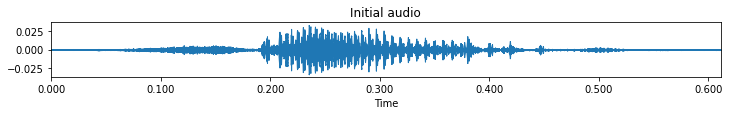

In [157]:
# 1. Load the audio file into an 'AudioSegment' object, and extract the sample rate. 
#    'x' is an array of samples that is only relevant for visualization at this part.
#    'sr' is the sampling rate of x
path='/content/data_01_0_01_43.wav'
rawsound = AudioSegment.from_file(path)
x, sr = librosa.load(path, sr = None)

plt.figure(figsize=(12,1))
librosa.display.waveplot(x, sr)
plt.title('Initial audio')

rawsound

In [158]:
"""
This file can be used to try a live prediction. 
"""

import keras
import librosa
import numpy as np


class LivePredictions:
    """
    Main class of the application.
    """

    def __init__(self, file):
        """
        Init method is used to initialize the main parameters.
        """
        self.file = file
        self.path = '/content/drive/MyDrive/Colab Notebooks/emotion-classification-from-audio-files/our_test_files/Emotion_Voice_Detection_Model66.h5'
        self.loaded_model = keras.models.load_model(self.path)

    def make_predictions(self):
        """
        Method to process the files and create your features.
        """
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        print(mfccs.shape)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
        predictions=self.loaded_model.predict(x) 
        classes_x=np.argmax(predictions,axis=1)
        print( "Prediction is", " ", self.convert_class_to_emotion(classes_x))

    @staticmethod
    def convert_class_to_emotion(pred):
        """
        Method to convert the predictions (int) into human readable strings.
        """
        
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label


if __name__ == '__main__':
    live_prediction = LivePredictions(file=path)
    live_prediction.loaded_model.summary()
    live_prediction.make_predictions()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 40, 128)           768       
                                                                 
 activation_15 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_10 (Dropout)        (None, 40, 128)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 5, 128)            82048     
                                                                 
 activation_16 (Activation)  (None, 5, 128)            0         
                                                      

In [5]:
   %%capture
import os 
import numpy as np

import librosa
from librosa import display  

from pydub import AudioSegment, effects
from noisereduce.noisereducev1 import reduce_noise as nr # reduces noisein signals like speech

import matplotlib.pyplot as plt 
import IPython.display as ipd #Create an audio object.

In [4]:
%%capture
!pip install pydub
!pip install noisereduce

In [ ]:
from pydub import AudioSegment
sound = AudioSegment.from_file('/content/achrafs758-20220614-0013.wav')

halfway_point = len(sound) // 2
first_half = sound[:halfway_point]

# create a new file "first_half.mp3":
first_half.export("/content/sn.wav", format="wav")

<_io.BufferedRandom name='/content/sn.wav'>

In [5]:
%%capture
!pip install pydub
!pip install noisereduce

In [6]:
%%capture
import os 
import numpy as np

import librosa
from librosa import display  

from pydub import AudioSegment, effects
from noisereduce.noisereducev1 import reduce_noise as nr # reduces noisein signals like speech

import matplotlib.pyplot as plt 
import IPython.display as ipd #Create an audio object.

In [34]:
from pydub import AudioSegment
track = AudioSegment.from_file('/content/Dis.m4a',  format= 'm4a')
file_handle = track.export('/content/Disss.wav', format='wav')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


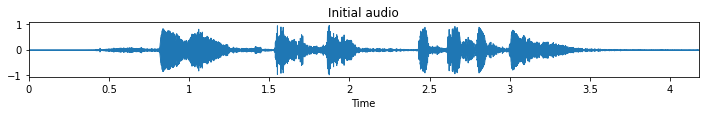

In [9]:
rawsound = AudioSegment.from_file('/content/Angry_lat.wav')
x, sr = librosa.load('/content/Angry.m4a', sr = None)

plt.figure(figsize=(12,1))
librosa.display.waveplot(x, sr)
plt.title('Initial audio')

rawsound

fjfgjkgkhllmj
fjfgjkgkhllmj


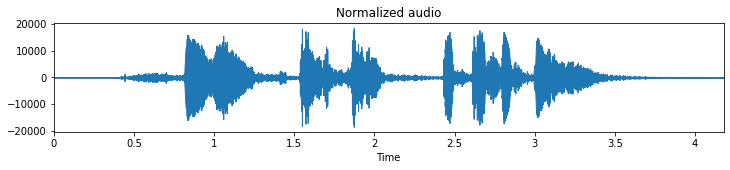

In [16]:
normalizedsound = effects.normalize(rawsound, headroom = 5.0) 
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveplot(normal_x, sr)
plt.title('Normalized audio')

print('fjfgjkgkhllmj')
print('fjfgjkgkhllmj')
normalizedsound

In [13]:
import numpy as np
from scipy.io import wavfile
import pyaudio

def sound(array, fs=8000):
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paInt16, channels=len(array.shape), rate=fs, output=True)
    stream.write(array.tobytes())
    stream.stop_stream()
    stream.close()
    p.terminate()

fjfgjkgkhllmj


In [ ]:
def record(duration=3, fs=8000):
    nsamples = duration*fs
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paInt16, channels=1, rate=fs, input=True,
                    frames_per_buffer=nsamples)
    buffer = stream.read(nsamples)
    array = np.frombuffer(buffer, dtype='int16')
    stream.stop_stream()
    stream.close()
    p.terminate()
    return array